<a target="_blank" href="https://colab.research.google.com/github/mHemaAP/S10/blob/main/S10.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Download Packages

In [1]:
!git clone https://github.com/mHemaAP/S10.git
%cd S10/
!git checkout .
!git checkout dev_staging
!git pull
%ls

Cloning into 'S10'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 0), reused 12 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), 323.56 KiB | 6.74 MiB/s, done.
/content/S10
Updated 0 paths from the index
Branch 'dev_staging' set up to track remote branch 'dev_staging' from 'origin'.
Switched to a new branch 'dev_staging'
Already up to date.
cifar/  README.md  requirements.txt  S10.ipynb


In [2]:
!pip install -r requirements.txt

## Import Libraries

In [3]:
import os
import torch
import numpy as np
# to debug
import pdb

## Import Custom Modules

In [4]:
from cifar.back_propogation import *
from cifar.cifar10_dataset import cifar10Set
from cifar.model import *
from cifar.utils import *
from cifar.scheduler import *
from cifar.model_training import *


/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
SEED = 11

# Set seed for reproducibility
torch.manual_seed(SEED)

## Assign Device & Batch Size

In [6]:
# Check if GPU/CUDA is available
use_cuda, device = get_device()

if use_cuda:
    torch.cuda.manual_seed(SEED)

print(device)

cuda


In [7]:
if use_cuda:
  batch_size = 512
else:
  batch_size = 64

In [8]:
# used for debugging purposes
%xmode Verbose

Exception reporting mode: Verbose


## Load CIFAR10 Data Set

In [9]:
cifar10_data = cifar10Set(batch_size, shuffle=True)

100%|██████████| 170498071/170498071 [00:13<00:00, 12962625.11it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


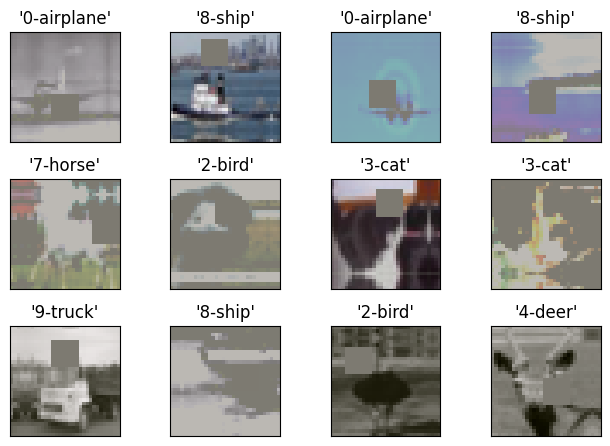

In [ ]:
cifar10_data.show_dataset_images()

## Instantiate Model

In [ ]:
model1 = custResNet()

In [ ]:
model1.summary(input_size=(batch_size, 3, 32, 32))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Param %
custResNet                               [512, 3, 32, 32]          [512, 10]                 --                        --                             --
├─custBlock: 1-1                         [512, 3, 32, 32]          [512, 64, 32, 32]         --                        --                             --
│    └─convLayer: 2-1                    [512, 3, 32, 32]          [512, 64, 32, 32]         --                        --                             --
│    │    └─Conv2d: 3-1                  [512, 3, 32, 32]          [512, 64, 32, 32]         1,728                     [3, 3]                      0.03%
│    │    └─BatchNorm2d: 3-2             [512, 64, 32, 32]         [512, 64, 32, 32]         128                       --                          0.00%
│    │    └─ReLU: 3-3                    [512, 64, 32, 32]         [512, 64, 32, 3

## Train Model

In [ ]:
EPOCHS = 24

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.63E-04


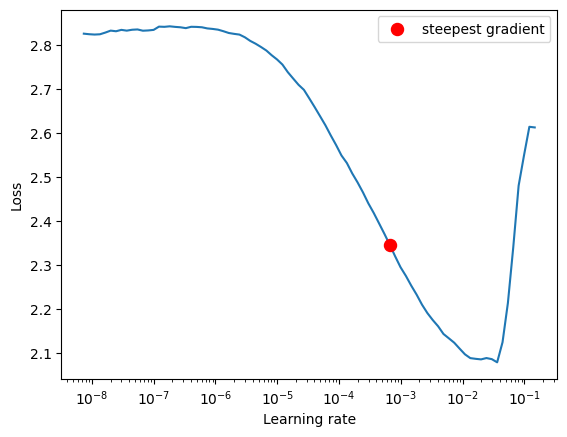

In [ ]:
train_model1 = trainModel(model1, train, test,
                          cifar10_data.train_loader,
                          cifar10_data.test_loader, epochs=EPOCHS,
                          device=device)

In [ ]:
train_model1.run_training_model()

| Epoch | LR       | Time    | TrainLoss | TrainAcc | TestLoss | TestAcc |
|     1 | 0.000154 | 00m 29s | 1.546921  |  34.97%  | 0.002787 |  50.28% |
|     2 | 0.000282 | 00m 29s | 1.278919  |  49.79%  | 0.002204 |  60.43% |
|     3 | 0.000409 | 00m 28s | 1.105353  |   57.5%  | 0.001785 |  67.98% |
|     4 | 0.000537 | 00m 29s | 1.021030  |  63.77%  | 0.001906 |  67.09% |
|     5 | 0.000663 | 00m 29s | 0.892731  |  66.19%  | 0.001572 |   73.0% |
|     6 | 0.000628 | 00m 29s | 0.900178  |  68.15%  | 0.001555 |  73.17% |
|     7 | 0.000593 | 00m 29s | 0.898194  |  70.58%  | 0.001157 |  79.89% |
|     8 | 0.000558 | 00m 29s | 0.858694  |  72.05%  | 0.001307 |  78.17% |
|     9 | 0.000523 | 00m 30s | 0.822543  |  72.92%  | 0.001149 |  80.56% |
|    10 | 0.000489 | 00m 29s | 0.759010  |  73.91%  | 0.001268 |  78.73% |
|    11 | 0.000454 | 00m 29s | 0.741669  |   74.6%  | 0.001157 |  80.08% |
|    12 | 0.000419 | 00m 29s | 0.794093  |   75.7%  | 0.001234 |  79.01% |
|    13 | 0.000384 | 00m 

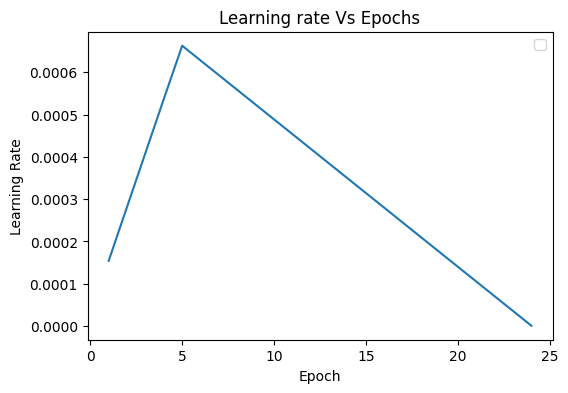

In [ ]:
curves = [{"x":np.arange(1,EPOCHS+1), "y": train_model1.lr_schedule, "label": "","xlabel": "Epoch", "ylabel":"Learning Rate"}]
plot_learning_rate_trend(curves,"Learning rate Vs Epochs",Figsize = (6,4))

## Plot Model Statistics

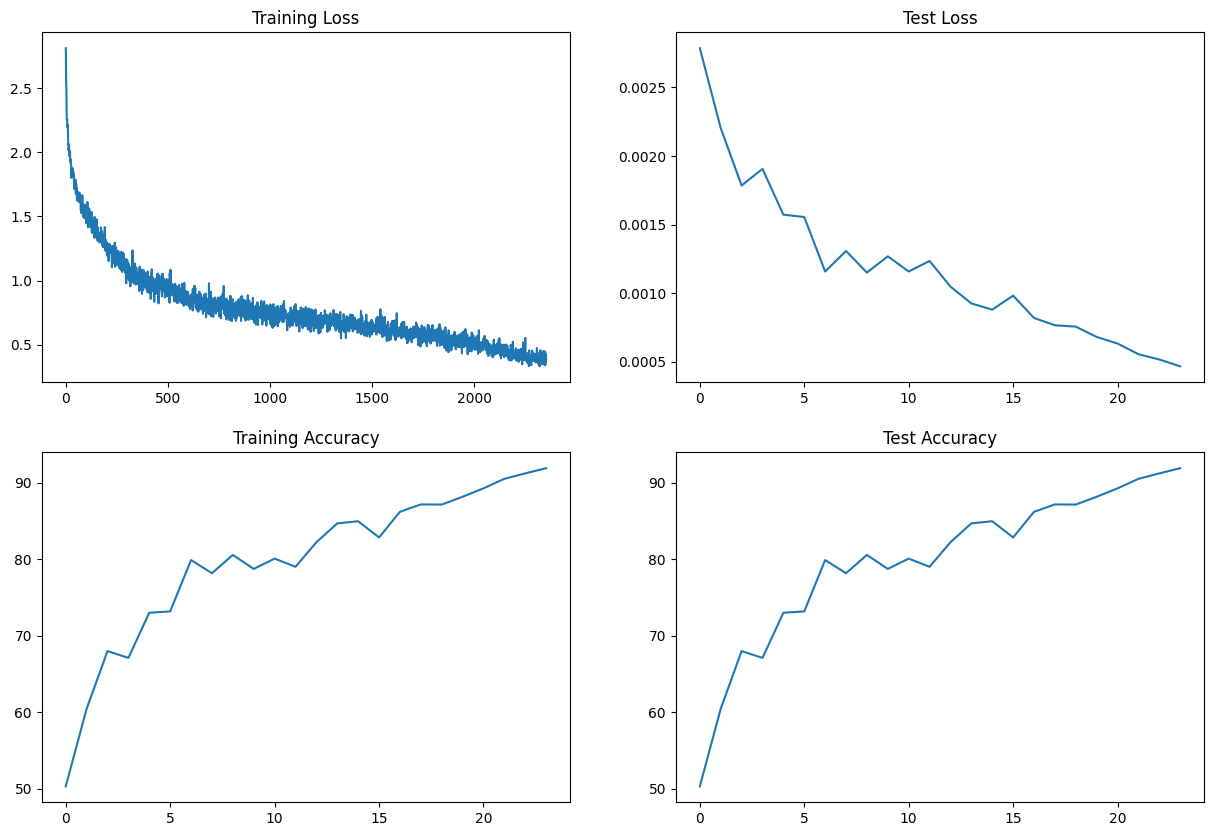

In [ ]:
train_model1.display_model_stats()

In [ ]:
train_model1.show_best_model()

Test Accuracy: 91.91% | Test Loss: 0.000465


## Display Incorrect Predictions

In [ ]:
model1_incorrect_pred = get_incorrect_test_predictions(model1,
                                                    device,
                                                    cifar10_data.test_loader)

0 - 'airplane' 1 - 'automobile' 2 - 'bird' 3 - 'cat' 4 - 'deer' 5 - 'dog' 6 - 'frog' 7 - 'horse' 8 - 'ship' 9 - 'truck' 

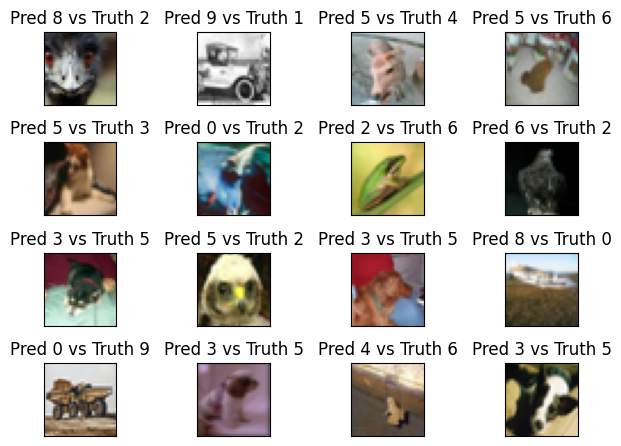

In [ ]:
cifar10_data.show_cifar10_incorrect_predictions(denormalize=True,
                                                incorrect_prediction=model1_incorrect_pred)

## Observations & Insights

**Target:**

- Network Architecture -
  - Prep Layer - (Conv 3x3 s1, p1) >> BN >> RELU [64k]
  - Block1 (with residual links added)
    - X = Conv 3x3 (s1, p1) >> MaxPool2D >> BN >> RELU [128k]
    - R1 (Residual Layer) = ResBlock( (Conv-BN-ReLU-Conv-BN-ReLU))(X) [128k]
    - Add(X, R1)
  - Block2 (non residual layer)
    - Conv 3x3 [256k]
    - MaxPooling2D
    - BN
    - ReLU
  - Block3(with residual links added)
    - X = Conv 3x3 (s1, p1) >> MaxPool2D >> BN >> RELU [512k]
    - R2 (Residual Layer) = ResBlock((Conv-BN-ReLU-Conv-BN-ReLU))(X) [512k]
    - Add(X, R2)
  - Output Layer
    - MaxPooling with Kernel Size 4
    - FC Layer
    - SoftMax

- Dropout of 0.01 (as some over-fitting observed)
- Transformations applied on the CIFAR10 data set along with the normalization are
  - ColorJitter
  - ToGray
  - PadIfNeeded
  - RandomCrop
  - IAAFliplr is deprecated, hence used HorizontalFlip instead
  - It is observed that ShiftScaleRotate led to more under-fitting of the model. Hence this is not used in the final model                                
  - CoarseDropout (same as CutOut)
  
- One cycle learning rate with LRMIN/MAX found using the range_test method of the LRFinder class is used
  - LRMIN = 1e-9, LRMAX = 0.04
- L1 regularization degraded the performance,
hence it is not used
- The receptive field we got with this network architecture is 48

**Results:**

- Parameters: 6,573,130 ~= 6.5M
- Best Train Accuracy: 86.07%
- Best Test Accuracy: 91.97% (24th Epoch)
- Test Accuracy: 90.6% (22nd Epoch) [First occurrence of test accuracy >= 90%]

**Analysis:**
- Model has no over fitting through out the training
- Model shows under-fitting performance
- Scheduling OneCycle LR with pct_start = 5/24 gave better train/test accuracies
trend in the 24 epochs
